In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
use_cuda = torch.cuda.is_available()
device   = torch.device("cuda" if use_cuda else "cpu")
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from PIL import Image


C:\Users\Vansh\AppData\Local\Temp\ipykernel_17044\2964899601.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Pytorchenv\TorchEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
labels_df = pd.read_csv(r"C:\Users\Vansh\Desktop\projects\Maverick\deforestation\train_v2.csv")

In [3]:
labels_df

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
...,...,...
40474,train_40474,clear primary
40475,train_40475,cloudy
40476,train_40476,agriculture clear primary
40477,train_40477,agriculture clear primary road


In [4]:
ohe_labels= pd.get_dummies(labels_df, columns = ['tags'])
print(ohe_labels)

        image_name  \
0          train_0   
1          train_1   
2          train_2   
3          train_3   
4          train_4   
...            ...   
40474  train_40474   
40475  train_40475   
40476  train_40476   
40477  train_40477   
40478  train_40478   

       tags_agriculture artisinal_mine bare_ground clear primary road  \
0                                                  False                
1                                                  False                
2                                                  False                
3                                                  False                
4                                                  False                
...                                                  ...                
40474                                              False                
40475                                              False                
40476                                              False                
40477

In [5]:
ohe_labels = ohe_labels.replace('False',0)
ohe_labels = ohe_labels.replace('True',1)

In [6]:
train_df, val_df = train_test_split(ohe_labels, test_size=0.2, random_state=42)
train_df, test_df = train_test_split(ohe_labels, test_size=0.25, random_state=42)

In [7]:
train_df['image_name'] = train_df['image_name'].apply(lambda x: f"{x}.jpg")
val_df['image_name'] = val_df['image_name'].apply(lambda x: f"{x}.jpg")
test_df['image_name'] = test_df['image_name'].apply(lambda x: f"{x}.jpg")

In [8]:
l1 = []
for i in train_df.columns:
    l1.append(i)

In [9]:
l1

['image_name',
 'tags_agriculture artisinal_mine bare_ground clear primary road',
 'tags_agriculture artisinal_mine bare_ground clear primary road water',
 'tags_agriculture artisinal_mine clear conventional_mine cultivation habitation primary road water',
 'tags_agriculture artisinal_mine clear cultivation habitation primary road water',
 'tags_agriculture artisinal_mine clear cultivation habitation primary water',
 'tags_agriculture artisinal_mine clear cultivation primary',
 'tags_agriculture artisinal_mine clear cultivation primary road water',
 'tags_agriculture artisinal_mine clear cultivation primary water',
 'tags_agriculture artisinal_mine clear habitation primary road water',
 'tags_agriculture artisinal_mine clear habitation road water',
 'tags_agriculture artisinal_mine clear primary',
 'tags_agriculture artisinal_mine clear primary road',
 'tags_agriculture artisinal_mine clear primary road water',
 'tags_agriculture artisinal_mine clear primary selective_logging water',
 

In [10]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, data_dir, transform=None):
        self.dataframe = dataframe
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        
        # Ensure the labels are properly formatted
        labels_str = self.dataframe[['tags_agriculture artisinal_mine bare_ground clear primary road',
 'tags_agriculture artisinal_mine bare_ground clear primary road water',
 'tags_agriculture artisinal_mine clear conventional_mine cultivation habitation primary road water',
 'tags_agriculture artisinal_mine clear cultivation habitation primary road water',
 'tags_agriculture artisinal_mine clear cultivation habitation primary water',
 'tags_agriculture artisinal_mine clear cultivation primary',
 'tags_agriculture artisinal_mine clear cultivation primary road water',
 'tags_agriculture artisinal_mine clear cultivation primary water',
 'tags_agriculture artisinal_mine clear habitation primary road water',
 'tags_agriculture artisinal_mine clear habitation road water',
 'tags_agriculture artisinal_mine clear primary',
 'tags_agriculture artisinal_mine clear primary road',
 'tags_agriculture artisinal_mine clear primary road water',
 'tags_agriculture artisinal_mine clear primary selective_logging water',
 'tags_agriculture artisinal_mine clear primary water',
 'tags_agriculture artisinal_mine clear road water',
 'tags_agriculture artisinal_mine partly_cloudy primary water',
 'tags_agriculture bare_ground blooming cultivation partly_cloudy primary selective_logging',
 'tags_agriculture bare_ground clear',
 'tags_agriculture bare_ground clear conventional_mine habitation primary road',
 'tags_agriculture bare_ground clear conventional_mine habitation primary road water',
 'tags_agriculture bare_ground clear conventional_mine habitation road',
 'tags_agriculture bare_ground clear cultivation habitation primary',
 'tags_agriculture bare_ground clear cultivation habitation primary road',
 'tags_agriculture bare_ground clear cultivation habitation primary road selective_logging',
 'tags_agriculture bare_ground clear cultivation habitation primary road water',
 'tags_agriculture bare_ground clear cultivation habitation primary water',
 'tags_agriculture bare_ground clear cultivation primary',
 'tags_agriculture bare_ground clear cultivation primary road',
 'tags_agriculture bare_ground clear cultivation primary road water',
 'tags_agriculture bare_ground clear cultivation primary selective_logging water',
 'tags_agriculture bare_ground clear cultivation primary slash_burn',
 'tags_agriculture bare_ground clear cultivation primary water',
 'tags_agriculture bare_ground clear cultivation road',
 'tags_agriculture bare_ground clear habitation',
 'tags_agriculture bare_ground clear habitation primary',
 'tags_agriculture bare_ground clear habitation primary road',
 'tags_agriculture bare_ground clear habitation primary road slash_burn',
 'tags_agriculture bare_ground clear habitation primary road water',
 'tags_agriculture bare_ground clear habitation primary water',
 'tags_agriculture bare_ground clear habitation road',
 'tags_agriculture bare_ground clear primary',
 'tags_agriculture bare_ground clear primary road',
 'tags_agriculture bare_ground clear primary road water',
 'tags_agriculture bare_ground clear primary water',
 'tags_agriculture bare_ground clear road',
 'tags_agriculture bare_ground clear water',
 'tags_agriculture bare_ground cultivation haze primary water',
 'tags_agriculture bare_ground habitation haze primary road',
 'tags_agriculture bare_ground habitation partly_cloudy primary',
 'tags_agriculture bare_ground habitation partly_cloudy primary road',
 'tags_agriculture bare_ground haze',
 'tags_agriculture bare_ground haze primary',
 'tags_agriculture bare_ground haze primary road',
 'tags_agriculture bare_ground haze primary water',
 'tags_agriculture bare_ground partly_cloudy primary',
 'tags_agriculture bare_ground partly_cloudy primary road',
 'tags_agriculture bare_ground partly_cloudy primary water',
 'tags_agriculture bare_ground partly_cloudy road',
 'tags_agriculture blooming blow_down clear cultivation primary',
 'tags_agriculture blooming clear cultivation habitation primary',
 'tags_agriculture blooming clear cultivation primary',
 'tags_agriculture blooming clear cultivation primary road',
 'tags_agriculture blooming clear cultivation primary selective_logging',
 'tags_agriculture blooming clear cultivation primary slash_burn',
 'tags_agriculture blooming clear cultivation primary water',
 'tags_agriculture blooming clear habitation primary road',
 'tags_agriculture blooming clear primary',
 'tags_agriculture blooming clear primary road',
 'tags_agriculture blooming clear primary road water',
 'tags_agriculture blooming cultivation haze primary',
 'tags_agriculture blooming cultivation partly_cloudy primary selective_logging',
 'tags_agriculture blow_down clear cultivation primary',
 'tags_agriculture blow_down clear habitation primary',
 'tags_agriculture blow_down clear primary',
 'tags_agriculture blow_down partly_cloudy primary',
 'tags_agriculture blow_down partly_cloudy primary blow_down',
 'tags_agriculture clear',
 'tags_agriculture clear conventional_mine cultivation habitation primary',
 'tags_agriculture clear conventional_mine cultivation habitation primary road',
 'tags_agriculture clear conventional_mine habitation primary road',
 'tags_agriculture clear conventional_mine habitation road',
 'tags_agriculture clear conventional_mine primary road',
 'tags_agriculture clear conventional_mine primary road water',
 'tags_agriculture clear conventional_mine primary water',
 'tags_agriculture clear cultivation',
 'tags_agriculture clear cultivation cultivation habitation primary',
 'tags_agriculture clear cultivation cultivation habitation primary road',
 'tags_agriculture clear cultivation cultivation habitation primary road slash_burn',
 'tags_agriculture clear cultivation cultivation habitation primary road slash_burn water',
 'tags_agriculture clear cultivation cultivation habitation primary road water',
 'tags_agriculture clear cultivation cultivation habitation primary water',
 'tags_agriculture clear cultivation cultivation habitation road water',
 'tags_agriculture clear cultivation cultivation primary',
 'tags_agriculture clear cultivation cultivation primary road',
 'tags_agriculture clear cultivation cultivation primary road water',
 'tags_agriculture clear cultivation cultivation primary slash_burn',
 'tags_agriculture clear cultivation cultivation primary water',
 'tags_agriculture clear cultivation cultivation road',
 'tags_agriculture clear cultivation habitation primary',
 'tags_agriculture clear cultivation habitation primary conventional_mine',
 'tags_agriculture clear cultivation habitation primary road',
 'tags_agriculture clear cultivation habitation primary road selective_logging',
 'tags_agriculture clear cultivation habitation primary road slash_burn',
 'tags_agriculture clear cultivation habitation primary road slash_burn water',
 'tags_agriculture clear cultivation habitation primary road water',
 'tags_agriculture clear cultivation habitation primary selective_logging',
 'tags_agriculture clear cultivation habitation primary slash_burn',
 'tags_agriculture clear cultivation habitation primary water',
 'tags_agriculture clear cultivation habitation road',
 'tags_agriculture clear cultivation primary',
 'tags_agriculture clear cultivation primary blooming',
 'tags_agriculture clear cultivation primary blow_down',
 'tags_agriculture clear cultivation primary road',
 'tags_agriculture clear cultivation primary road selective_logging',
 'tags_agriculture clear cultivation primary road selective_logging slash_burn water',
 'tags_agriculture clear cultivation primary road slash_burn',
 'tags_agriculture clear cultivation primary road water',
 'tags_agriculture clear cultivation primary selective_logging',
 'tags_agriculture clear cultivation primary selective_logging water',
 'tags_agriculture clear cultivation primary slash_burn',
 'tags_agriculture clear cultivation primary slash_burn water',
 'tags_agriculture clear cultivation primary water',
 'tags_agriculture clear cultivation road',
 'tags_agriculture clear cultivation road water',
 'tags_agriculture clear cultivation water',
 'tags_agriculture clear habitation',
 'tags_agriculture clear habitation primary',
 'tags_agriculture clear habitation primary road',
 'tags_agriculture clear habitation primary road blow_down',
 'tags_agriculture clear habitation primary road selective_logging',
 'tags_agriculture clear habitation primary road selective_logging water',
 'tags_agriculture clear habitation primary road slash_burn',
 'tags_agriculture clear habitation primary road water',
 'tags_agriculture clear habitation primary road water conventional_mine',
 'tags_agriculture clear habitation primary slash_burn',
 'tags_agriculture clear habitation primary slash_burn water',
 'tags_agriculture clear habitation primary water',
 'tags_agriculture clear habitation road',
 'tags_agriculture clear habitation road water',
 'tags_agriculture clear primary',
 'tags_agriculture clear primary blow_down',
 'tags_agriculture clear primary conventional_mine',
 'tags_agriculture clear primary road',
 'tags_agriculture clear primary road conventional_mine',
 'tags_agriculture clear primary road selective_logging',
 'tags_agriculture clear primary road slash_burn',
 'tags_agriculture clear primary road slash_burn water',
 'tags_agriculture clear primary road water',
 'tags_agriculture clear primary road water conventional_mine',
 'tags_agriculture clear primary selective_logging',
 'tags_agriculture clear primary slash_burn',
 'tags_agriculture clear primary slash_burn water',
 'tags_agriculture clear primary water',
 'tags_agriculture clear primary water conventional_mine',
 'tags_agriculture clear road',
 'tags_agriculture clear road water',
 'tags_agriculture clear water',
 'tags_agriculture conventional_mine habitation partly_cloudy primary road',
 'tags_agriculture conventional_mine partly_cloudy primary',
 'tags_agriculture cultivation cultivation habitation partly_cloudy primary road',
 'tags_agriculture cultivation cultivation habitation partly_cloudy primary road water',
 'tags_agriculture cultivation cultivation haze primary road',
 'tags_agriculture cultivation cultivation partly_cloudy primary',
 'tags_agriculture cultivation cultivation partly_cloudy primary road',
 'tags_agriculture cultivation cultivation partly_cloudy primary water',
 'tags_agriculture cultivation habitation haze primary',
 'tags_agriculture cultivation habitation haze primary road',
 'tags_agriculture cultivation habitation haze primary road water',
 'tags_agriculture cultivation habitation haze primary water',
 'tags_agriculture cultivation habitation partly_cloudy primary',
 'tags_agriculture cultivation habitation partly_cloudy primary road',
 'tags_agriculture cultivation habitation partly_cloudy primary road water',
 'tags_agriculture cultivation habitation partly_cloudy primary slash_burn',
 'tags_agriculture cultivation habitation partly_cloudy primary water',
 'tags_agriculture cultivation haze primary',
 'tags_agriculture cultivation haze primary road',
 'tags_agriculture cultivation haze primary road water',
 'tags_agriculture cultivation haze primary water',
 'tags_agriculture cultivation partly_cloudy',
 'tags_agriculture cultivation partly_cloudy primary',
 'tags_agriculture cultivation partly_cloudy primary road',
 'tags_agriculture cultivation partly_cloudy primary road selective_logging',
 'tags_agriculture cultivation partly_cloudy primary road water',
 'tags_agriculture cultivation partly_cloudy primary selective_logging',
 'tags_agriculture cultivation partly_cloudy primary slash_burn',
 'tags_agriculture cultivation partly_cloudy primary water',
 'tags_agriculture habitation haze primary',
 'tags_agriculture habitation haze primary road',
 'tags_agriculture habitation haze primary road water',
 'tags_agriculture habitation haze primary water',
 'tags_agriculture habitation haze road',
 'tags_agriculture habitation partly_cloudy primary',
 'tags_agriculture habitation partly_cloudy primary road',
 'tags_agriculture habitation partly_cloudy primary road water',
 'tags_agriculture habitation partly_cloudy primary road water conventional_mine',
 'tags_agriculture habitation partly_cloudy primary water',
 'tags_agriculture habitation partly_cloudy road',
 'tags_agriculture haze',
 'tags_agriculture haze primary',
 'tags_agriculture haze primary road',
 'tags_agriculture haze primary road selective_logging',
 'tags_agriculture haze primary road water',
 'tags_agriculture haze primary water',
 'tags_agriculture haze road',
 'tags_agriculture haze water',
 'tags_agriculture partly_cloudy',
 'tags_agriculture partly_cloudy primary',
 'tags_agriculture partly_cloudy primary blow_down',
 'tags_agriculture partly_cloudy primary road',
 'tags_agriculture partly_cloudy primary road conventional_mine',
 'tags_agriculture partly_cloudy primary road selective_logging',
 'tags_agriculture partly_cloudy primary road slash_burn',
 'tags_agriculture partly_cloudy primary road water',
 'tags_agriculture partly_cloudy primary selective_logging',
 'tags_agriculture partly_cloudy primary slash_burn',
 'tags_agriculture partly_cloudy primary water',
 'tags_agriculture partly_cloudy road',
 'tags_agriculture partly_cloudy road water',
 'tags_agriculture partly_cloudy water',
 'tags_artisinal_mine bare_ground clear cultivation primary water',
 'tags_artisinal_mine bare_ground clear habitation primary road water',
 'tags_artisinal_mine bare_ground clear habitation road',
 'tags_artisinal_mine bare_ground clear primary',
 'tags_artisinal_mine bare_ground clear primary road',
 'tags_artisinal_mine bare_ground clear primary road water',
 'tags_artisinal_mine bare_ground clear primary selective_logging water',
 'tags_artisinal_mine bare_ground clear primary water',
 'tags_artisinal_mine bare_ground clear road water',
 'tags_artisinal_mine bare_ground clear water',
 'tags_artisinal_mine bare_ground partly_cloudy primary road',
 'tags_artisinal_mine bare_ground partly_cloudy primary road water',
 'tags_artisinal_mine bare_ground partly_cloudy primary water',
 'tags_artisinal_mine clear conventional_mine habitation primary road water',
 'tags_artisinal_mine clear conventional_mine primary road water',
 'tags_artisinal_mine clear cultivation primary road water',
 'tags_artisinal_mine clear cultivation primary water',
 'tags_artisinal_mine clear habitation primary road',
 'tags_artisinal_mine clear habitation primary road water',
 'tags_artisinal_mine clear habitation primary water',
 'tags_artisinal_mine clear primary',
 'tags_artisinal_mine clear primary road',
 'tags_artisinal_mine clear primary road selective_logging water',
 'tags_artisinal_mine clear primary road water',
 'tags_artisinal_mine clear primary selective_logging',
 'tags_artisinal_mine clear primary selective_logging water',
 'tags_artisinal_mine clear primary water',
 'tags_artisinal_mine clear road water',
 'tags_artisinal_mine clear water',
 'tags_artisinal_mine habitation partly_cloudy primary road water',
 'tags_artisinal_mine haze primary',
 'tags_artisinal_mine haze primary water',
 'tags_artisinal_mine partly_cloudy primary',
 'tags_artisinal_mine partly_cloudy primary road',
 'tags_artisinal_mine partly_cloudy primary road water',
 'tags_artisinal_mine partly_cloudy primary water',
 'tags_artisinal_mine partly_cloudy water',
 'tags_bare_ground blooming clear cultivation primary',
 'tags_bare_ground blow_down clear primary',
 'tags_bare_ground blow_down clear primary slash_burn',
 'tags_bare_ground clear',
 'tags_bare_ground clear conventional_mine habitation primary road',
 'tags_bare_ground clear conventional_mine habitation primary road water',
 'tags_bare_ground clear conventional_mine primary road',
 'tags_bare_ground clear cultivation habitation primary',
 'tags_bare_ground clear cultivation habitation primary road',
 'tags_bare_ground clear cultivation habitation primary road water',
 'tags_bare_ground clear cultivation habitation primary water',
 'tags_bare_ground clear cultivation primary',
 'tags_bare_ground clear cultivation primary road',
 'tags_bare_ground clear cultivation primary road selective_logging',
 'tags_bare_ground clear cultivation primary road water',
 'tags_bare_ground clear cultivation primary water',
 'tags_bare_ground clear habitation',
 'tags_bare_ground clear habitation primary',
 'tags_bare_ground clear habitation primary road',
 'tags_bare_ground clear habitation primary road water',
 'tags_bare_ground clear habitation primary selective_logging',
 'tags_bare_ground clear habitation primary water',
 'tags_bare_ground clear habitation road',
 'tags_bare_ground clear habitation road water',
 'tags_bare_ground clear primary',
 'tags_bare_ground clear primary road',
 'tags_bare_ground clear primary road selective_logging',
 'tags_bare_ground clear primary road water',
 'tags_bare_ground clear primary selective_logging slash_burn water',
 'tags_bare_ground clear primary selective_logging water',
 'tags_bare_ground clear primary slash_burn',
 'tags_bare_ground clear primary slash_burn water',
 'tags_bare_ground clear primary water',
 'tags_bare_ground clear road',
 'tags_bare_ground clear road water',
 'tags_bare_ground clear water',
 'tags_bare_ground conventional_mine partly_cloudy primary road',
 'tags_bare_ground cultivation habitation partly_cloudy primary',
 'tags_bare_ground cultivation haze primary',
 'tags_bare_ground cultivation partly_cloudy primary',
 'tags_bare_ground cultivation partly_cloudy primary road',
 'tags_bare_ground cultivation partly_cloudy primary selective_logging',
 'tags_bare_ground habitation haze primary road',
 'tags_bare_ground habitation haze primary water',
 'tags_bare_ground habitation partly_cloudy primary',
 'tags_bare_ground habitation partly_cloudy primary road',
 'tags_bare_ground haze',
 'tags_bare_ground haze primary',
 'tags_bare_ground haze primary water',
 'tags_bare_ground partly_cloudy',
 'tags_bare_ground partly_cloudy primary',
 'tags_bare_ground partly_cloudy primary road',
 'tags_bare_ground partly_cloudy primary slash_burn',
 'tags_bare_ground partly_cloudy primary water',
 'tags_blooming clear cultivation habitation primary slash_burn',
 'tags_blooming clear cultivation primary',
 'tags_blooming clear primary',
 'tags_blooming clear primary road',
 'tags_blooming clear primary selective_logging',
 'tags_blooming clear primary water',
 'tags_blooming cultivation partly_cloudy primary water',
 'tags_blooming haze primary',
 'tags_blooming partly_cloudy primary',
 'tags_blooming partly_cloudy primary selective_logging',
 'tags_blow_down clear cultivation habitation primary',
 'tags_blow_down clear cultivation primary',
 'tags_blow_down clear primary',
 'tags_blow_down clear primary blow_down',
 'tags_blow_down clear primary road',
 'tags_blow_down clear primary selective_logging',
 'tags_blow_down clear primary slash_burn',
 'tags_blow_down clear primary water',
 'tags_blow_down partly_cloudy primary',
 'tags_blow_down partly_cloudy primary water',
 'tags_clear bare_ground',
 'tags_clear conventional_mine habitation primary',
 'tags_clear conventional_mine habitation primary road',
 'tags_clear conventional_mine habitation primary road water',
 'tags_clear conventional_mine habitation road',
 'tags_clear conventional_mine primary',
 'tags_clear conventional_mine primary road',
 'tags_clear conventional_mine primary road water',
 'tags_clear conventional_mine primary water',
 'tags_clear cultivation habitation primary',
 'tags_clear cultivation habitation primary road',
 'tags_clear cultivation habitation primary road slash_burn',
 'tags_clear cultivation habitation primary road water',
 'tags_clear cultivation habitation primary selective_logging',
 'tags_clear cultivation habitation primary slash_burn',
 'tags_clear cultivation habitation primary slash_burn water',
 'tags_clear cultivation habitation primary water',
 'tags_clear cultivation primary',
 'tags_clear cultivation primary road',
 'tags_clear cultivation primary road selective_logging',
 'tags_clear cultivation primary road slash_burn',
 'tags_clear cultivation primary road water',
 'tags_clear cultivation primary selective_logging',
 'tags_clear cultivation primary selective_logging water',
 'tags_clear cultivation primary slash_burn',
 'tags_clear cultivation primary slash_burn water',
 'tags_clear cultivation primary water',
 'tags_clear habitation primary',
 'tags_clear habitation primary blooming',
 'tags_clear habitation primary road',
 'tags_clear habitation primary road selective_logging',
 'tags_clear habitation primary road water',
 'tags_clear habitation primary selective_logging',
 'tags_clear habitation primary slash_burn',
 'tags_clear habitation primary water',
 'tags_clear habitation road',
 'tags_clear habitation road water',
 'tags_clear habitation water',
 'tags_clear primary',
 'tags_clear primary blooming',
 'tags_clear primary blow_down',
 'tags_clear primary road',
 'tags_clear primary road blooming',
 'tags_clear primary road selective_logging',
 'tags_clear primary road selective_logging water',
 'tags_clear primary road water',
 'tags_clear primary road water conventional_mine',
 'tags_clear primary selective_logging',
 'tags_clear primary selective_logging water',
 'tags_clear primary slash_burn',
 'tags_clear primary slash_burn water',
 'tags_clear primary water',
 'tags_clear road',
 'tags_clear road water',
 'tags_clear water',
 'tags_cloudy',
 'tags_conventional_mine habitation partly_cloudy primary road',
 'tags_conventional_mine habitation partly_cloudy primary road water',
 'tags_conventional_mine haze primary',
 'tags_conventional_mine haze primary road',
 'tags_conventional_mine partly_cloudy',
 'tags_conventional_mine partly_cloudy primary',
 'tags_conventional_mine partly_cloudy primary road',
 'tags_conventional_mine partly_cloudy primary road water',
 'tags_cultivation habitation haze primary',
 'tags_cultivation habitation haze primary road water',
 'tags_cultivation habitation haze primary water',
 'tags_cultivation habitation partly_cloudy primary',
 'tags_cultivation habitation partly_cloudy primary road',
 'tags_cultivation habitation partly_cloudy primary road water',
 'tags_cultivation habitation partly_cloudy primary slash_burn',
 'tags_cultivation haze primary',
 'tags_cultivation haze primary road',
 'tags_cultivation haze primary slash_burn',
 'tags_cultivation haze primary water',
 'tags_cultivation partly_cloudy primary',
 'tags_cultivation partly_cloudy primary road',
 'tags_cultivation partly_cloudy primary selective_logging',
 'tags_cultivation partly_cloudy primary slash_burn',
 'tags_cultivation partly_cloudy primary water',
 'tags_habitation haze primary',
 'tags_habitation haze primary road',
 'tags_habitation haze primary road water',
 'tags_habitation haze primary slash_burn',
 'tags_habitation haze primary water',
 'tags_habitation haze water',
 'tags_habitation partly_cloudy primary',
 'tags_habitation partly_cloudy primary road',
 'tags_habitation partly_cloudy primary road water',
 'tags_habitation partly_cloudy primary water',
 'tags_habitation partly_cloudy road',
 'tags_haze primary',
 'tags_haze primary blooming',
 'tags_haze primary road',
 'tags_haze primary road selective_logging',
 'tags_haze primary road selective_logging water',
 'tags_haze primary road water',
 'tags_haze primary selective_logging',
 'tags_haze primary water',
 'tags_haze road water',
 'tags_haze water',
 'tags_partly_cloudy',
 'tags_partly_cloudy primary',
 'tags_partly_cloudy primary agriculture water',
 'tags_partly_cloudy primary blooming',
 'tags_partly_cloudy primary blow_down',
 'tags_partly_cloudy primary road',
 'tags_partly_cloudy primary road selective_logging',
 'tags_partly_cloudy primary road selective_logging water',
 'tags_partly_cloudy primary road water',
 'tags_partly_cloudy primary road water conventional_mine',
 'tags_partly_cloudy primary selective_logging',
 'tags_partly_cloudy primary selective_logging water',
 'tags_partly_cloudy primary slash_burn',
 'tags_partly_cloudy primary water',
 'tags_partly_cloudy road water',
 'tags_partly_cloudy water',
 'tags_water']].iloc[idx]
        #labels_list = labels_str.split()  # Assuming tags are comma-separated
        labels = np.array(labels_str).astype('float32')  # Ensure correct shape
        
        if self.transform:
            image = self.transform(image)
        
        return image, labels

transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Assuming train_df and val_df are already defined pandas DataFrames

# Create dataset instances
train_dataset = CustomDataset(dataframe=train_df, data_dir=r"C:\Users\Vansh\Desktop\projects\Maverick\deforestation\train-jpg", transform=transform)
val_dataset = CustomDataset(dataframe=val_df, data_dir=r"C:\Users\Vansh\Desktop\projects\Maverick\deforestation\train-jpg", transform=transform)
test_dataset = CustomDataset(dataframe=test_df, data_dir=r"C:\Users\Vansh\Desktop\projects\Maverick\deforestation\train-jpg", transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [11]:
train_loader.dataset[0]

(tensor([[[0.3823, 0.3823, 0.3823,  ..., 0.4166, 0.4337, 0.4337],
          [0.4166, 0.3823, 0.3481,  ..., 0.3994, 0.4337, 0.4337],
          [0.3823, 0.3823, 0.3823,  ..., 0.3823, 0.3994, 0.4166],
          ...,
          [0.3823, 0.3994, 0.3823,  ..., 0.3481, 0.3481, 0.3652],
          [0.3994, 0.3994, 0.3823,  ..., 0.3481, 0.3652, 0.3652],
          [0.4166, 0.3994, 0.3823,  ..., 0.3652, 0.3652, 0.3823]],
 
         [[0.7304, 0.7304, 0.7129,  ..., 0.7479, 0.7654, 0.7479],
          [0.7304, 0.7304, 0.7129,  ..., 0.7479, 0.7654, 0.7654],
          [0.7304, 0.7304, 0.7129,  ..., 0.7304, 0.7479, 0.7479],
          ...,
          [0.6779, 0.7129, 0.7304,  ..., 0.6954, 0.6954, 0.6779],
          [0.7479, 0.7304, 0.7129,  ..., 0.6779, 0.6779, 0.6779],
          [0.7304, 0.7479, 0.7304,  ..., 0.6604, 0.6604, 0.6954]],
 
         [[0.8274, 0.8274, 0.8274,  ..., 0.8622, 0.8622, 0.8622],
          [0.8622, 0.8448, 0.8274,  ..., 0.8622, 0.8622, 0.8622],
          [0.8622, 0.8622, 0.8448,  ...,

In [12]:
print(len(train_loader.dataset))
print(len(val_loader.dataset))
print(len(test_loader.dataset))

30359
8096
10120


In [13]:
num_classes = 449
learning_rate = 1e-4
batch_size = 32
num_epochs = 20

In [14]:
import torch.nn as nn
class CustomClassifier(nn.Module):
    def __init__(self, in_features, num_classes=449):
        super(CustomClassifier, self).__init__()
        
        self.fc1_1=nn.Linear(in_features=in_features, out_features=num_classes)
        

    def forward(self, x):
        
        x = self.fc1_1(x)
       
        return x

In [15]:
from torchvision.models import densenet169,  DenseNet169_Weights
model=densenet169(weights=DenseNet169_Weights.IMAGENET1K_V1)

In [16]:
from torchvision.models import densenet169,  DenseNet169_Weights

model=densenet169(weights=DenseNet169_Weights.IMAGENET1K_V1)
# Freeze all layers except the last classification layer
for name, param in model.named_parameters():
    if not name.startswith('classifier'):  # Exclude parameters of the last classification layer
        param.requires_grad = False

num_ftrs = model.classifier.in_features
model.classifier = CustomClassifier(num_ftrs)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [17]:
from torchsummary import summary
model_stats = summary(model, (3, 128, 128), verbose=1)
summary_str = str(model_stats)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1664, 4, 4]          --
|    └─Conv2d: 2-1                       [-1, 64, 64, 64]          (9,408)
|    └─BatchNorm2d: 2-2                  [-1, 64, 64, 64]          (128)
|    └─ReLU: 2-3                         [-1, 64, 64, 64]          --
|    └─MaxPool2d: 2-4                    [-1, 64, 32, 32]          --
|    └─_DenseBlock: 2-5                  [-1, 256, 32, 32]         --
|    |    └─_DenseLayer: 3-1             [-1, 32, 32, 32]          (45,440)
|    |    └─_DenseLayer: 3-2             [-1, 32, 32, 32]          (49,600)
|    |    └─_DenseLayer: 3-3             [-1, 32, 32, 32]          (53,760)
|    |    └─_DenseLayer: 3-4             [-1, 32, 32, 32]          (57,920)
|    |    └─_DenseLayer: 3-5             [-1, 32, 32, 32]          (62,080)
|    |    └─_DenseLayer: 3-6             [-1, 32, 32, 32]          (66,240)
|    └─_Transition: 2-6                  

In [18]:
from torch.optim import AdamW
from tqdm import tqdm
#from lion_pytorch import Lion
from sklearn.metrics import precision_score, recall_score, f1_score
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [19]:
import torch
import torch.nn as nn
from tqdm import tqdm
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize criterion, optimizer, and scheduler
criterion = nn.BCEWithLogitsLoss()
optimizer = AdamW(model.parameters(), lr=learning_rate)
scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.01, patience=3)

num_epochs = 5

for epoch in range(num_epochs):
    # Training
    model.train()  # Set model to training mode
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
        
        # Convert outputs to binary predictions
        outputs = torch.sigmoid(outputs)  # Apply sigmoid to get probabilities
        predictions = (outputs > 0.5).float()  # Convert probabilities to binary predictions
        
        # Calculate accuracy
        correct_train += (predictions == labels).sum().item()
        total_train += labels.numel()

    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = correct_train / total_train * 100

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            # Convert outputs to binary predictions
            outputs = torch.sigmoid(outputs)
            predictions = (outputs > 0.5).float()
            
            # Calculate accuracy
            correct_val += (predictions == labels).sum().item()
            total_val += labels.numel()

            # Collect predictions and labels for later evaluation
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = correct_val / total_val * 100

    scheduler.step(val_loss)

    # Calculate precision, recall, and F1 score
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss:.4f}, Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')
    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Epoch 1/5: 100%|██████████| 253/253 [00:41<00:00,  6.17it/s]


Epoch 1/5, Loss: 0.0476, Acc: 99.47%, Val Loss: 0.0149, Val Acc: 99.84%
Precision: 0.8259, Recall: 0.3604, F1 Score: 0.4016


Epoch 2/5: 100%|██████████| 253/253 [00:40<00:00,  6.24it/s]


Epoch 2/5, Loss: 0.0108, Acc: 99.84%, Val Loss: 0.0096, Val Acc: 99.85%
Precision: 0.7764, Recall: 0.4117, F1 Score: 0.4922


Epoch 3/5: 100%|██████████| 253/253 [00:40<00:00,  6.18it/s]


Epoch 3/5, Loss: 0.0085, Acc: 99.85%, Val Loss: 0.0082, Val Acc: 99.85%
Precision: 0.7430, Recall: 0.4319, F1 Score: 0.4864


Epoch 4/5: 100%|██████████| 253/253 [00:42<00:00,  6.01it/s]


Epoch 4/5, Loss: 0.0075, Acc: 99.85%, Val Loss: 0.0074, Val Acc: 99.85%
Precision: 0.7368, Recall: 0.4532, F1 Score: 0.4666


Epoch 5/5: 100%|██████████| 253/253 [00:40<00:00,  6.28it/s]


Epoch 5/5, Loss: 0.0070, Acc: 99.85%, Val Loss: 0.0069, Val Acc: 99.85%
Precision: 0.7042, Recall: 0.4697, F1 Score: 0.5162


In [20]:

for epoch in range(1):
    model.eval()
    test_loss = 0.0
    total_test = 0
    correct_test= 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs= inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)

            # Convert outputs to binary predictions
            outputs = torch.sigmoid(outputs)
            predictions = (outputs > 0.5).float()
            correct_test += (predictions == labels).sum().item()
            total_test += labels.numel()

        # Collect predictions and labels for later evaluation
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    test_loss = test_loss / len(test_loader.dataset)
    test_accuracy = correct_test / total_test * 100

    scheduler.step(test_loss)

    # Calculate precision, recall, and F1 score
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    

    
    

    # Print the epoch statistics
    print(f' test Loss: {test_loss:.4f}, test Acc: {test_accuracy:.2f}%')
    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

Epoch 1/5: 100%|██████████| 317/317 [01:01<00:00,  5.15it/s]


 test Loss: 0.0069, test Acc: 99.85%
Precision: 0.6939, Recall: 0.4702, F1 Score: 0.5225


In [21]:
import torch

confusion_matrix = torch.zeros(num_classes, num_classes)

with torch.no_grad():
    test_running_corrects = 0.0
    test_total = 0.0
    model.eval()
    for i, (test_inputs, test_labels) in enumerate(val_loader, 0):
        test_inputs, test_labels = test_inputs.cuda(), test_labels.cuda()

        # Convert one-hot encoded labels to class indices
        test_labels = torch.argmax(test_labels, dim=1)

        test_outputs = model(test_inputs)
        _, test_preds = torch.max(test_outputs, dim=1)  # Get predicted classes

        # Debugging print statements
        

        if test_preds.shape[0] != test_labels.shape[0]:
            raise RuntimeError(f"Shape mismatch: test_preds has shape {test_preds.shape} but test_labels has shape {test_labels.shape}")

        test_total += test_labels.size(0)
        test_running_corrects += (test_preds == test_labels).sum().item()  # Calculate correct predictions

        for t, p in zip(test_labels.view(-1), test_preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
        
    print(f'Testing Accuracy: {(100 * test_running_corrects / test_total)}%')
confusion_matrix = confusion_matrix.int()
print(f'Confusion Matrix:\n {confusion_matrix}')


Testing Accuracy: 57.95454545454545%
Confusion Matrix:
 tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the confusion matrix to a NumPy array
confusion_matrix_np = confusion_matrix.numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(17, 15))
sns.heatmap(confusion_matrix_np, annot=True, fmt='g', cmap='rocket_r', 
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000231AB31A310> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [24]:
torch.save(model, r'C:\Users\Vansh\Desktop\projects\Maverick\deforestation\def_densenet169.pth')

In [27]:
import re

def parse_training_output(sample_text):
    # Extracting relevant information using regular expressions
    train_loss = [float(match.group(1)) for match in re.finditer(r'Epoch \d+/\d+, Loss: ([\d.]+), Acc:', sample_text)]
    
    # Extracting only the first occurrence of accuracy for each epoch
    train_acc = [float(match.group(1)) for match in re.finditer(r'Acc: ([\d.]+)%', sample_text)][::2]
    
    val_loss = [float(match.group(1)) for match in re.finditer(r'Val Loss: ([\d.]+)', sample_text)]
    val_acc = [float(match.group(1)) for match in re.finditer(r'Val Acc: ([\d.]+)%', sample_text)]
    precision = [float(match.group(1)) for match in re.finditer(r'Precision: ([\d.]+)', sample_text)]
    recall = [float(match.group(1)) for match in re.finditer(r'Recall: ([\d.]+)', sample_text)]
    f1_score = [float(match.group(1)) for match in re.finditer(r'F1 Score: ([\d.]+)', sample_text)]

    # Creating the dictionary
    data = {
        'Epoch': [i for i in range(1,11)],
        'Train_Loss': train_loss,
        'Train_Acc': train_acc,
        'Val_Loss': val_loss,
        'Val_Acc': val_acc,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1_score
    }

    return data

# Sample text
sample_text = """
Epoch 1/10:   0%|          | 0/949 [00:00<?, ?it/s]
Epoch 1/10: 100%|██████████| 949/949 [02:20<00:00,  6.77it/s]
Epoch 1/10: 100%|██████████| 253/253 [00:33<00:00,  7.45it/s]
Epoch 1/10, Loss: 0.1833, Acc: 95.14%, Val Loss: 0.1419, Val Acc: 95.42%
Precision: 0.7112, Recall: 0.1114, F1 Score: 0.1903
Epoch 2/10: 100%|██████████| 949/949 [02:04<00:00,  7.65it/s]
Epoch 2/10: 100%|██████████| 253/253 [00:32<00:00,  7.89it/s]
Epoch 2/10, Loss: 0.1308, Acc: 95.67%, Val Loss: 0.1246, Val Acc: 95.84%
Precision: 0.7090, Recall: 0.2684, F1 Score: 0.3798
Epoch 3/10: 100%|██████████| 949/949 [02:02<00:00,  7.76it/s]
Epoch 3/10: 100%|██████████| 253/253 [00:31<00:00,  8.00it/s]
Epoch 3/10, Loss: 0.1209, Acc: 95.81%, Val Loss: 0.1172, Val Acc: 95.89%
Precision: 0.7277, Recall: 0.2671, F1 Score: 0.3816
Epoch 4/10: 100%|██████████| 949/949 [02:11<00:00,  7.22it/s]
Epoch 4/10: 100%|██████████| 253/253 [00:32<00:00,  7.84it/s]
Epoch 4/10, Loss: 0.1146, Acc: 95.92%, Val Loss: 0.1119, Val Acc: 96.06%
Precision: 0.7016, Recall: 0.3595, F1 Score: 0.4609
Epoch 5/10: 100%|██████████| 949/949 [02:11<00:00,  7.22it/s]
Epoch 5/10: 100%|██████████| 253/253 [00:32<00:00,  7.74it/s]
Epoch 5/10, Loss: 0.1108, Acc: 96.01%, Val Loss: 0.1090, Val Acc: 96.05%
Precision: 0.6930, Recall: 0.3709, F1 Score: 0.4679
Epoch 6/10: 100%|██████████| 949/949 [02:17<00:00,  6.91it/s]
Epoch 6/10: 100%|██████████| 253/253 [00:33<00:00,  7.52it/s]
Epoch 6/10, Loss: 0.1078, Acc: 96.10%, Val Loss: 0.1083, Val Acc: 96.13%
Precision: 0.6637, Recall: 0.3582, F1 Score: 0.5248
Epoch 7/10: 100%|██████████| 949/949 [02:08<00:00,  7.37it/s]
Epoch 7/10: 100%|██████████| 253/253 [00:31<00:00,  8.09it/s]
Epoch 7/10, Loss: 0.1068, Acc: 96.17%, Val Loss: 0.1076, Val Acc: 96.15%
Precision: 0.6671, Recall: 0.3582, F1 Score: 0.5256
Epoch 8/10: 100%|██████████| 949/949 [02:04<00:00,  7.65it/s]
Epoch 8/10: 100%|██████████| 253/253 [00:32<00:00,  7.76it/s]
Epoch 8/10, Loss: 0.1054, Acc: 96.14%, Val Loss: 0.1057, Val Acc: 96.08%
Precision: 0.6340, Recall: 0.3848, F1 Score: 0.5384
Epoch 9/10: 100%|██████████| 949/949 [02:04<00:00,  7.63it/s]
Epoch 9/10: 100%|██████████| 253/253 [00:31<00:00,  8.12it/s]
Epoch 9/10, Loss: 0.1034, Acc: 96.21%, Val Loss: 0.1078, Val Acc: 96.18%
Precision: 0.7068, Recall: 0.3253, F1 Score: 0.5050
Epoch 10/10: 100%|██████████| 949/949 [02:03<00:00,  7.66it/s]
Epoch 10/10: 100%|██████████| 253/253 [00:32<00:00,  7.86it/s]
Epoch 10/10, Loss: 0.1033, Acc: 96.21%, Val Loss: 0.1060, Val Acc: 96.12%
Precision: 0.6552, Recall: 0.3633, F1 Score: 0.5269
"""

# Calling the function
parsed_data = parse_training_output(sample_text)
# Displaying the result
print(parsed_data)

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Train_Loss': [0.1833, 0.1308, 0.1209, 0.1146, 0.1108, 0.1078, 0.1068, 0.1054, 0.1034, 0.1033], 'Train_Acc': [95.14, 95.67, 95.81, 95.92, 96.01, 96.1, 96.17, 96.14, 96.21, 96.21], 'Val_Loss': [0.1419, 0.1246, 0.1172, 0.1119, 0.109, 0.1083, 0.1076, 0.1057, 0.1078, 0.106], 'Val_Acc': [95.42, 95.84, 95.89, 96.06, 96.05, 96.13, 96.15, 96.08, 96.18, 96.12], 'Precision': [0.7112, 0.709, 0.7277, 0.7016, 0.693, 0.6637, 0.6671, 0.634, 0.7068, 0.6552], 'Recall': [0.1114, 0.2684, 0.2671, 0.3595, 0.3709, 0.3582, 0.3582, 0.3848, 0.3253, 0.3633], 'F1_Score': [0.1903, 0.3798, 0.3816, 0.4609, 0.4679, 0.5248, 0.5256, 0.5384, 0.505, 0.5269]}


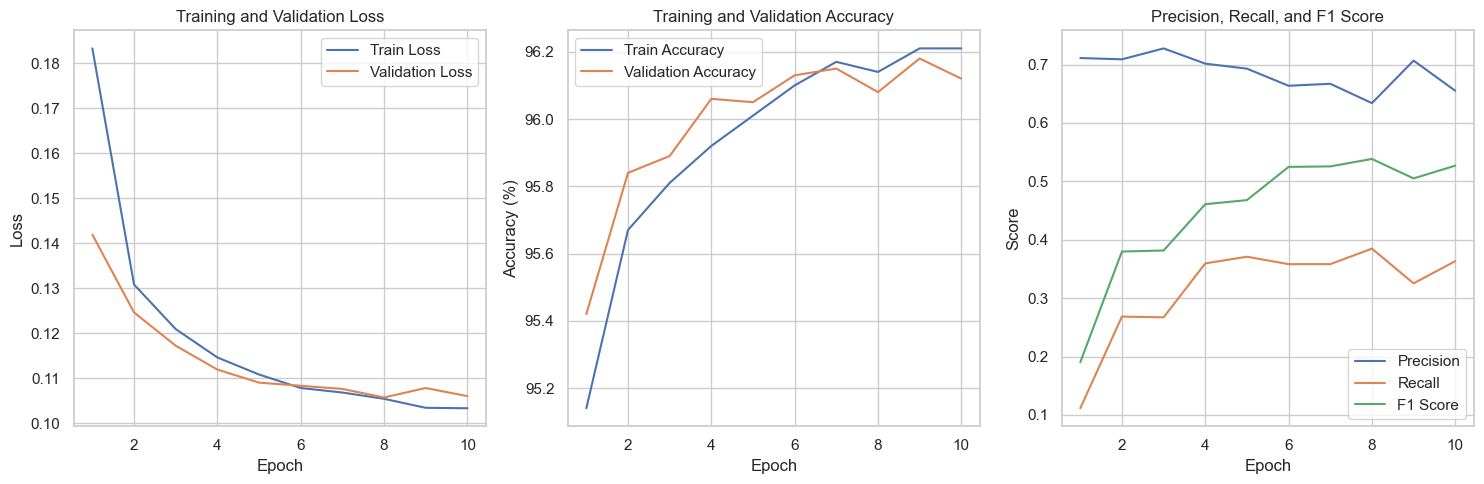

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

##################################################################################################


##################################################################################################

# Convert data to a Pandas DataFrame
df = pd.DataFrame(parsed_data)

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a horizontal line subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the training and validation loss
sns.lineplot(x='Epoch', y='Train_Loss', data=df, label='Train Loss', ax=axes[0])
sns.lineplot(x='Epoch', y='Val_Loss', data=df, label='Validation Loss', ax=axes[0])
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

# Plotting the training and validation accuracy
sns.lineplot(x='Epoch', y='Train_Acc', data=df, label='Train Accuracy', ax=axes[1])
sns.lineplot(x='Epoch', y='Val_Acc', data=df, label='Validation Accuracy', ax=axes[1])
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')

# Plotting the precision, recall, and F1 score
sns.lineplot(x='Epoch', y='Precision', data=df, label='Precision', ax=axes[2])
sns.lineplot(x='Epoch', y='Recall', data=df, label='Recall', ax=axes[2])
sns.lineplot(x='Epoch', y='F1_Score', data=df, label='F1 Score', ax=axes[2])
axes[2].set_title('Precision, Recall, and F1 Score')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Score')

plt.tight_layout()
#plt.savefig(r'D:\ADNI\model_inferences\EFFICIENTNET_B0_lion_64_lr.png',dpi=300)
plt.show()